#Question 1

In [1]:
import gzip
!pip install idx2numpy
import idx2numpy
import numpy as np
from google.colab.patches import cv2_imshow, cv2
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7918 sha256=31e5adb7cf88a655b897bb9defa8fecfe47dba0907fab108003c596ef0fc1a09
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [2]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz


!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz


!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz


!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2023-05-06 04:39:22--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-05-06 04:39:22 (88.1 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-05-06 04:39:23--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===========

In [3]:
!gzip -d train-images-idx3-ubyte.gz

!gzip -d train-labels-idx1-ubyte.gz

!gzip -d t10k-images-idx3-ubyte.gz

!gzip -d t10k-labels-idx1-ubyte.gz

In [4]:
train_images_file = 'train-images-idx3-ubyte'
train_lable_file = 'train-labels-idx1-ubyte'
test_images_file = 't10k-images-idx3-ubyte'
test_lable_file = 't10k-labels-idx1-ubyte'

X_train = idx2numpy.convert_from_file(train_images_file)
y_train = idx2numpy.convert_from_file(train_lable_file)
X_test = idx2numpy.convert_from_file(test_images_file)
y_test = idx2numpy.convert_from_file(test_lable_file)

In [5]:
cv2_imshow(X_train[0])
print(y_train.shape)
print(X_train.shape)

train_input = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
test_input = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
print(train_input.shape)
print(train_input)
print(y_train.shape)
print(test_input.shape)

(60000,)
(60000, 28, 28)
(60000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(60000,)
(10000, 784)


In [6]:
y_train_formatted = np.reshape(np.array([1 if y_train[i] > 4 else 0 for i in range(len(y_train))]), (-1, 1))
y_test_formatted = np.reshape(np.array([1 if y_test[i] > 4 else 0 for i in range(len(y_test))]), (-1, 1))
print(y_train_formatted.shape)
print(y_train_formatted)
print(y_test_formatted)
print(y_test_formatted.shape)

(60000, 1)
[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
[[1]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]
(10000, 1)


In [7]:
train_input_std = (train_input - np.mean(train_input)) / np.std(train_input)
test_input_std = (test_input - np.mean(test_input)) / np.std(test_input)
print(train_input.shape)
print(test_input.shape)
print(pd.DataFrame(train_input_std).describe())

(60000, 784)
(10000, 784)
                0             1             2             3             4    \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      -0.424074     -0.424074     -0.424074     -0.424074     -0.424074   
std        0.000000      0.000000      0.000000      0.000000      0.000000   
min       -0.424074     -0.424074     -0.424074     -0.424074     -0.424074   
25%       -0.424074     -0.424074     -0.424074     -0.424074     -0.424074   
50%       -0.424074     -0.424074     -0.424074     -0.424074     -0.424074   
75%       -0.424074     -0.424074     -0.424074     -0.424074     -0.424074   
max       -0.424074     -0.424074     -0.424074     -0.424074     -0.424074   

                5             6             7             8             9    \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      -0.424074     -0.424074     -0.424074     -0.424074     -0.424074   
std        0.000000      

In [8]:
train_input_bias = np.concatenate([train_input_std, np.ones((train_input_std.shape[0], 1))], axis=1)
test_input_bias = np.concatenate([test_input_std, np.ones((test_input_std.shape[0], 1))], axis=1)
print(train_input_bias.shape)
print(test_input_bias.shape)

(60000, 785)
(10000, 785)


In [9]:
print(train_input_bias[:, -1])
print(test_input_bias[:, -1])

[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


#Question 2

In [10]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
class Linear_classifier:
  
  def __init__(self, numClasses):
    self.w = None
    self.numClasses = numClasses
    np.random.seed(42)
    
  def model(self, x):
    #x = batch_size X numFeatures, w = numClasses X numFeatures
    #print(x.shape, self.w.shape) 
    a = np.matmul(self.w, x.T).T
    return 1/(1 + np.exp(-a))

    
  def predict(self, X):
    
    result = self.model(X)
    return np.array([1 if result[i] > 0.5 else 0 for i in range(len(result))])

  def data_mini_batches(self, X, y, batch_size):
    mini_batches = []
    data = np.concatenate((X, y), axis = 1)
    #np.random.seed(10)
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
  
    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        mini_batches.append(mini_batch)
    if data.shape[0] % batch_size != 0:
        rem_mini_batch = data[(i + 1) * batch_size:, :]
        mini_batches.append(rem_mini_batch)
    return np.array(mini_batches)
  
  def loss(self, X, y, W):
    
    a = self.model(X)
    b = X.shape[0]
    loss = 1/b * (sum((y - a)**2))
    return loss
  
  def fit(self, X, Y, epochs = 1, lr = 1, batch_size = 1, l2 = 0.1):
    
    self.w = np.zeros((Y.shape[1], X.shape[1]))
    print(self.w.shape)
    accuracy = []
    max_accuracy = 0
    chkptw = None

    loss_list = []

    for i in range(epochs):
      SGD_mini_batches = self.data_mini_batches(X, Y, batch_size)
      loss_add = 0
      for m in SGD_mini_batches:
        x = m[:, :-(self.numClasses-1)]
        y = m[:, -self.numClasses+1:]
        # print("m shape", m.shape)
        # print("x shape", x.shape)
        # print("y shape", y.shape)
        y_pred = self.model(x)
        y_pred = y_pred > 0.5
        #self.w = numClasses X numFeatures, y-y_pred = batch_size X numClasses, x = batch_size X numFeatures
        self.w = self.w + ((lr/batch_size) * np.matmul((y - y_pred).T, x)) - (2 * l2 * self.w)
        loss_add += self.loss(x, y, self.w)
      loss_list.append(loss_add / len(SGD_mini_batches))

      stepAccuracy = accuracy_score(self.predict(test_input_bias), y_test_formatted)
      accuracy.append(stepAccuracy)
      if(stepAccuracy > max_accuracy):
        max_accuracy = stepAccuracy
        chkptw = self.w

    self.w = chkptw
    print("Maximum Accuracy", max_accuracy)
    plt.plot(accuracy, label = "Test Accuracy")
    plt.plot(loss_list, label = "Loss")
    plt.legend()
    plt.show()

(60000, 785) (60000, 1)
(1, 785)
Maximum Accuracy 0.7889


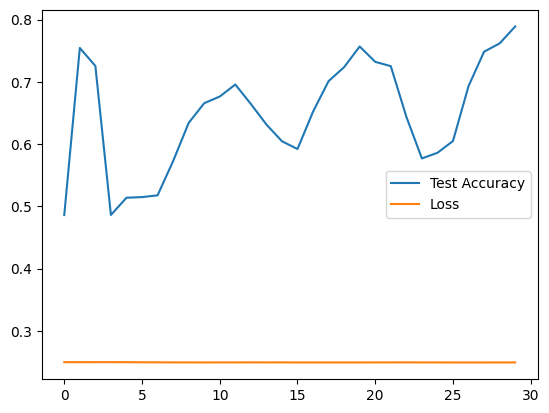

Time taken for training: 33.48149037361145


In [11]:
import time
linear_class_1 = Linear_classifier(numClasses = 2)
print(train_input_bias.shape, y_train_formatted.shape)
s = time.time()
linear_class_1.fit(train_input_bias, y_train_formatted, epochs = 30, lr = 0.0001, batch_size = 60000, l2 = 0.01)
e = time.time()
print("Time taken for training:", e-s)

In [12]:
cv2_imshow(X_test[20])
cv2_imshow(X_test[21])
cv2_imshow(X_test[22])
cv2_imshow(X_test[23])
cv2_imshow(X_test[24])
print(linear_class_1.predict(test_input_bias[20:25]))
print(y_test_formatted[20:25])

[1 1 0 1 0]
[[1]
 [1]
 [1]
 [1]
 [0]]


#Question 3

#Quadratic Loss

###Xavier initialization is done using np.random.randn

100%|██████████| 6000/6000 [00:00<00:00, 7438.86it/s]


Epoch 10/10, Loss 0.1204, Train Acc 0.8853, Test Acc 0.8884


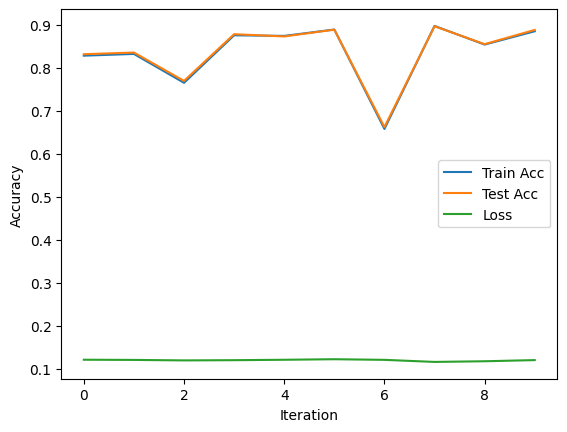

K =  5
Final Test Acc: 0.8884


100%|██████████| 6000/6000 [00:03<00:00, 1724.85it/s]


Epoch 10/10, Loss 0.1133, Train Acc 0.9482, Test Acc 0.9383


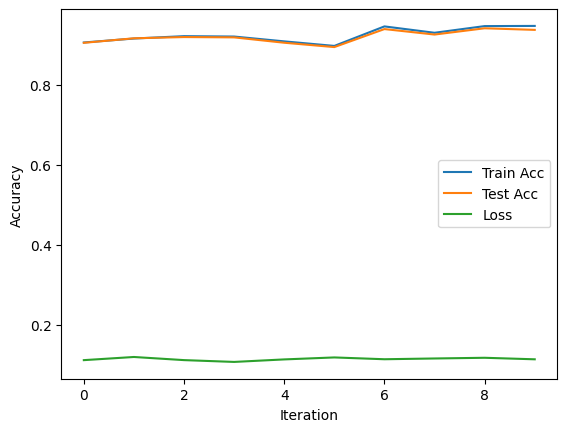

K =  40
Final Test Acc: 0.9383


100%|██████████| 6000/6000 [00:10<00:00, 578.48it/s]


Epoch 10/10, Loss 0.1041, Train Acc 0.9716, Test Acc 0.9514


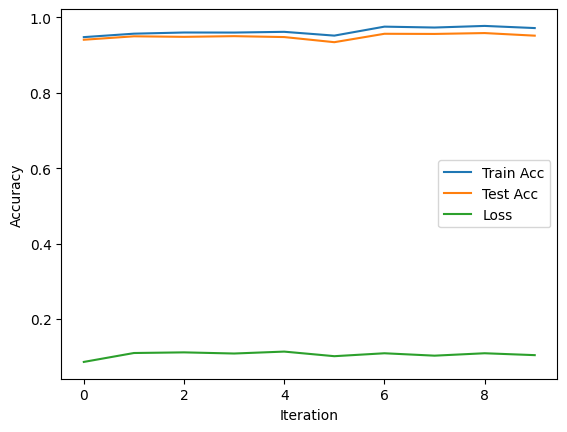

K =  200
Final Test Acc: 0.9514


In [25]:
import numpy as np
from tqdm import tqdm

np.random.seed(10)
num_hidden_units = [5, 40, 200]  # number of hidden units
for k in num_hidden_units:
    input_dim = train_input_bias.shape[1]
    output_dim = 1  
    W1 = np.random.randn(input_dim, k) / np.sqrt(input_dim)
    b1 = np.zeros(k)
    W2 = np.random.randn(k, output_dim) / np.sqrt(k)
    b2 = np.zeros(output_dim)

    
    def forward(x, W1, b1, W2, b2):
        h = np.maximum(0, np.dot(x, W1) + b1)  # ReLU activation
        y = np.dot(h, W2) + b2
        return h, y

    
    def loss(y_true, y_pred):
        return np.mean(0.5 * np.square(y_true - y_pred))

    
    n_epochs = 10
    batch_size = 10
    n_batches = train_input_bias.shape[0] // batch_size
    learning_rate = 0.035
    train_loss_history = []
    train_acc_history = []
    test_acc_history = []
    max_test_acc = 0
    bestW1, bestb1, bestW2, bestb2 = None, None, None, None
    for epoch in range(n_epochs):
        if bestW1 is not None and bestb1 is not None and bestW2 is not None and bestb2 is not None:
            W1 = bestW1
            W2 = bestW2
            b1 = bestb1
            b2 = bestb2
        p = np.random.permutation(train_input_bias.shape[0])
        x_train = train_input_bias[p, :]
        y_train = y_train_formatted[p, :]
        for batch in tqdm(range(n_batches)):
            
            start = batch * batch_size
            end = start + batch_size
            x_batch = x_train[start:end]
            y_batch = y_train[start:end]

            
            h, y_pred = forward(x_batch, W1, b1, W2, b2)

            
            batch_loss = loss(y_batch, y_pred)
            y_pred = y_pred > 0.5
            grad_y_pred = (y_pred - y_batch)
            grad_W2 = np.dot(h.T, grad_y_pred)
            grad_b2 = np.sum(grad_y_pred, axis=0)
            grad_h = np.dot(grad_y_pred, W2.T)
            grad_h[h <= 0] = 0
            grad_W1 = np.dot(x_batch.T, grad_h)
            grad_b1 = np.sum(grad_h, axis=0)

            
            W2 -= learning_rate * grad_W2 / batch_size
            b2 -= learning_rate * grad_b2 / batch_size
            W1 -= learning_rate * grad_W1 / batch_size
            b1 -= learning_rate * grad_b1 / batch_size

        
        h, y_pred_train = forward(x_train, W1, b1, W2, b2)
        #print(y_pred_train.shape)
        #print(np.reshape(y_pred_train, (-1, 5)).shape)
        train_acc = np.mean((y_pred_train > 0.5) == y_train)
        train_acc_history.append(train_acc)

        
        hTest, y_pred_test = forward(test_input_bias, W1, b1, W2, b2)
        test_acc = np.mean((y_pred_test > 0.5) == y_test_formatted)
        if test_acc > max_test_acc:
          max_test_acc = test_acc
          bestW1 = W1
          bestb1 = b1
          bestW2 = W2
          bestb2 = b2
        test_acc_history.append(test_acc)
        train_loss_history.append(batch_loss)

    
    print("Epoch {}/{}, Loss {:.4f}, Train Acc {:.4f}, Test Acc {:.4f}"
          .format(epoch + 1, n_epochs, batch_loss, train_acc, test_acc))

    
    

    import matplotlib.pyplot as plt
    plt.plot(train_acc_history, label='Train Acc')
    plt.plot(test_acc_history, label='Test Acc')
    plt.plot(train_loss_history, label='Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    print("K = ", k)
    print("Final Test Acc: {:.4f}".format(test_acc))
    

#Question 4

#Log loss

##k = 5

100%|██████████| 6000/6000 [00:01<00:00, 3550.19it/s]


Epoch 10/10, Loss 0.6906, Train Acc 0.8573, Test Acc 0.8663


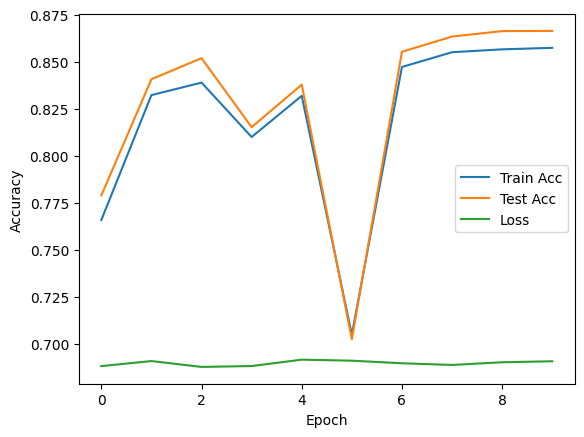

K =  5
Final Test Acc: 0.8663


In [43]:
import numpy as np
from tqdm import tqdm

np.random.seed(10)
k = 5
input_dim = train_input_bias.shape[1]
output_dim = 1  
W1 = np.random.randn(input_dim, k) / np.sqrt(input_dim)
b1 = np.zeros(k)
W2 = np.random.randn(k, output_dim) / np.sqrt(k)
b2 = np.zeros(output_dim)


def forward(x, W1, b1, W2, b2):
    h = np.maximum(0, np.dot(x, W1) + b1)  # ReLU activation
    y = 1 / (1 + np.exp(-(np.dot(h, W2) + b2)))
    return h, y


def loss(y_true, y_pred):
    epsilon = 1e-3
    return -np.mean(y_true*np.log(y_pred + epsilon) + (1-y_true)*np.log(1-y_pred + epsilon))


n_epochs = 10
batch_size = 10
n_batches = train_input_bias.shape[0] // batch_size
learning_rate = 0.005
train_loss_history = []
train_acc_history = []
test_acc_history = []
max_test_acc = 0
bestW1, bestb1, bestW2, bestb2 = None, None, None, None
for epoch in range(n_epochs):
    if bestW1 is not None and bestb1 is not None and bestW2 is not None and bestb2 is not None:
        W1 = bestW1
        W2 = bestW2
        b1 = bestb1
        b2 = bestb2
    p = np.random.permutation(train_input_bias.shape[0])
    x_train = train_input_bias[p, :]
    y_train = y_train_formatted[p, :]
    for batch in tqdm(range(n_batches)):
        
        start = batch * batch_size
        end = start + batch_size
        x_batch = x_train[start:end]
        y_batch = y_train[start:end]

        
        h, y_pred = forward(x_batch, W1, b1, W2, b2)

        
        batch_loss = loss(y_batch, y_pred)
        y_pred = y_pred > 0.5
        grad_y_pred = y_pred - y_batch
        grad_W2 = np.dot(h.T, grad_y_pred)
        grad_b2 = np.sum(grad_y_pred, axis=0)
        grad_h = np.dot(grad_y_pred, W2.T) * np.where(h * (1 - h) > 0, h * (1 - h), np.where(h > 0, h, (1 - h)))
        grad_W1 = np.dot(x_batch.T, grad_h)
        grad_b1 = np.sum(grad_h, axis=0)

        
        W2 -= learning_rate * grad_W2 / batch_size
        b2 -= learning_rate * grad_b2 / batch_size
        W1 -= learning_rate * grad_W1 / batch_size
        b1 -= learning_rate * grad_b1 / batch_size

    
    h, y_pred_train = forward(x_train, W1, b1, W2, b2)
    train_acc = np.mean((y_pred_train > 0.5) == y_train)
    train_acc_history.append(train_acc)

    
    hTest, y_pred_test = forward(test_input_bias, W1, b1, W2, b2)
    test_acc = np.mean((y_pred_test > 0.5) == y_test_formatted)
    if test_acc > max_test_acc:
      max_test_acc = test_acc
      bestW1 = W1
      bestb1 = b1
      bestW2 = W2
      bestb2 = b2
    test_acc_history.append(test_acc)
    train_loss_history.append(batch_loss)


print("Epoch {}/{}, Loss {:.4f}, Train Acc {:.4f}, Test Acc {:.4f}"
      .format(epoch + 1, n_epochs, batch_loss, train_acc, test_acc))


import matplotlib.pyplot as plt
plt.plot(train_acc_history, label='Train Acc')
plt.plot(test_acc_history, label='Test Acc')
plt.plot(train_loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("K = ", k)
print("Final Test Acc: {:.4f}".format(test_acc))
    

##K = 40

100%|██████████| 6000/6000 [00:03<00:00, 1952.75it/s]


Epoch 10/10, Loss 0.6869, Train Acc 0.8746, Test Acc 0.8772


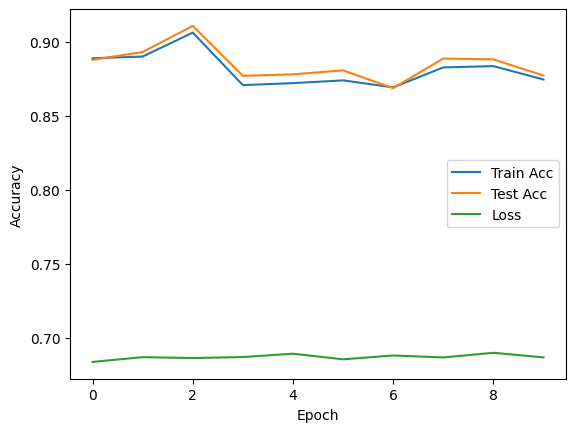

K =  40
Final Test Acc: 0.8772


In [51]:
import numpy as np
from tqdm import tqdm

np.random.seed(10)
k = 40
input_dim = train_input_bias.shape[1]
output_dim = 1  
W1 = np.random.randn(input_dim, k) / np.sqrt(input_dim)
b1 = np.zeros(k)
W2 = np.random.randn(k, output_dim) / np.sqrt(k)
b2 = np.zeros(output_dim)


def forward(x, W1, b1, W2, b2):
    h = np.maximum(0, np.dot(x, W1) + b1)  # ReLU activation
    y = 1 / (1 + np.exp(-(np.dot(h, W2) + b2)))
    return h, y


def loss(y_true, y_pred):
    epsilon = 1e-3
    return -np.mean(y_true*np.log(y_pred + epsilon) + (1-y_true)*np.log(1-y_pred + epsilon))


n_epochs = 10
batch_size = 10
n_batches = train_input_bias.shape[0] // batch_size
learning_rate = 0.006
train_loss_history = []
train_acc_history = []
test_acc_history = []
max_test_acc = 0
bestW1, bestb1, bestW2, bestb2 = None, None, None, None
for epoch in range(n_epochs):
    if bestW1 is not None and bestb1 is not None and bestW2 is not None and bestb2 is not None:
        W1 = bestW1
        W2 = bestW2
        b1 = bestb1
        b2 = bestb2
    p = np.random.permutation(train_input_bias.shape[0])
    x_train = train_input_bias[p, :]
    y_train = y_train_formatted[p, :]
    for batch in tqdm(range(n_batches)):
        
        start = batch * batch_size
        end = start + batch_size
        x_batch = x_train[start:end]
        y_batch = y_train[start:end]

        
        h, y_pred = forward(x_batch, W1, b1, W2, b2)

        
        batch_loss = loss(y_batch, y_pred)
        y_pred = y_pred > 0.5
        grad_y_pred = y_pred - y_batch
        grad_W2 = np.dot(h.T, grad_y_pred)
        grad_b2 = np.sum(grad_y_pred, axis=0)
        grad_h = np.dot(grad_y_pred, W2.T) * np.where(h * (1 - h) > 0, h * (1 - h), np.where(h > 0, h, (1 - h)))
        grad_W1 = np.dot(x_batch.T, grad_h)
        grad_b1 = np.sum(grad_h, axis=0)

        
        W2 -= learning_rate * grad_W2 / batch_size
        b2 -= learning_rate * grad_b2 / batch_size
        W1 -= learning_rate * grad_W1 / batch_size
        b1 -= learning_rate * grad_b1 / batch_size

    
    h, y_pred_train = forward(x_train, W1, b1, W2, b2)
    train_acc = np.mean((y_pred_train > 0.5) == y_train)
    train_acc_history.append(train_acc)

    
    hTest, y_pred_test = forward(test_input_bias, W1, b1, W2, b2)
    test_acc = np.mean((y_pred_test > 0.5) == y_test_formatted)
    if test_acc > max_test_acc:
      max_test_acc = test_acc
      bestW1 = W1
      bestb1 = b1
      bestW2 = W2
      bestb2 = b2
    test_acc_history.append(test_acc)
    train_loss_history.append(batch_loss)


print("Epoch {}/{}, Loss {:.4f}, Train Acc {:.4f}, Test Acc {:.4f}"
      .format(epoch + 1, n_epochs, batch_loss, train_acc, test_acc))


import matplotlib.pyplot as plt
plt.plot(train_acc_history, label='Train Acc')
plt.plot(test_acc_history, label='Test Acc')
plt.plot(train_loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("K = ", k)
print("Final Test Acc: {:.4f}".format(test_acc))
    

##K = 200

100%|██████████| 6000/6000 [00:11<00:00, 541.39it/s]


Epoch 10/10, Loss 0.6731, Train Acc 0.9351, Test Acc 0.9337


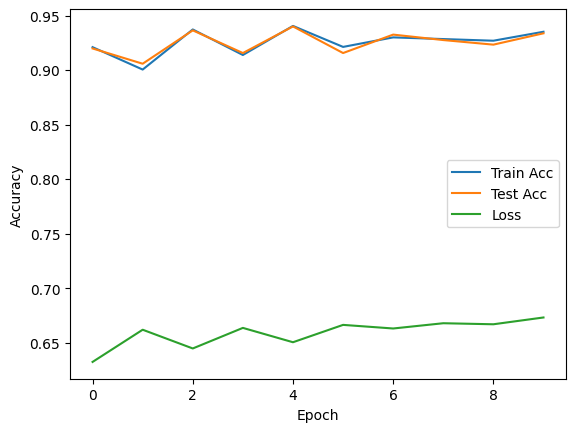

K =  200
Final Test Acc: 0.9337


In [45]:
import numpy as np
from tqdm import tqdm

np.random.seed(10)
k = 200
input_dim = train_input_bias.shape[1]
output_dim = 1  
W1 = np.random.randn(input_dim, k) / np.sqrt(input_dim)
b1 = np.zeros(k)
W2 = np.random.randn(k, output_dim) / np.sqrt(k)
b2 = np.zeros(output_dim)


def forward(x, W1, b1, W2, b2):
    h = np.maximum(0, np.dot(x, W1) + b1)  # ReLU activation
    y = 1 / (1 + np.exp(-(np.dot(h, W2) + b2)))
    return h, y


def loss(y_true, y_pred):
    epsilon = 1e-3
    return -np.mean(y_true*np.log(y_pred + epsilon) + (1-y_true)*np.log(1-y_pred + epsilon))


n_epochs = 10
batch_size = 10
n_batches = train_input_bias.shape[0] // batch_size
learning_rate = 0.01
train_loss_history = []
train_acc_history = []
test_acc_history = []
max_test_acc = 0
bestW1, bestb1, bestW2, bestb2 = None, None, None, None
for epoch in range(n_epochs):
    if bestW1 is not None and bestb1 is not None and bestW2 is not None and bestb2 is not None:
        W1 = bestW1
        W2 = bestW2
        b1 = bestb1
        b2 = bestb2
    p = np.random.permutation(train_input_bias.shape[0])
    x_train = train_input_bias[p, :]
    y_train = y_train_formatted[p, :]
    for batch in tqdm(range(n_batches)):
        
        start = batch * batch_size
        end = start + batch_size
        x_batch = x_train[start:end]
        y_batch = y_train[start:end]

        
        h, y_pred = forward(x_batch, W1, b1, W2, b2)

        
        batch_loss = loss(y_batch, y_pred)
        y_pred = y_pred > 0.5
        grad_y_pred = y_pred - y_batch
        grad_W2 = np.dot(h.T, grad_y_pred)
        grad_b2 = np.sum(grad_y_pred, axis=0)
        grad_h = np.dot(grad_y_pred, W2.T) * np.where(h * (1 - h) > 0, h * (1 - h), np.where(h > 0, h, (1 - h)))
        grad_W1 = np.dot(x_batch.T, grad_h)
        grad_b1 = np.sum(grad_h, axis=0)

        
        W2 -= learning_rate * grad_W2 / batch_size
        b2 -= learning_rate * grad_b2 / batch_size
        W1 -= learning_rate * grad_W1 / batch_size
        b1 -= learning_rate * grad_b1 / batch_size

    
    h, y_pred_train = forward(x_train, W1, b1, W2, b2)
    train_acc = np.mean((y_pred_train > 0.5) == y_train)
    train_acc_history.append(train_acc)

    
    hTest, y_pred_test = forward(test_input_bias, W1, b1, W2, b2)
    test_acc = np.mean((y_pred_test > 0.5) == y_test_formatted)
    if test_acc > max_test_acc:
      max_test_acc = test_acc
      bestW1 = W1
      bestb1 = b1
      bestW2 = W2
      bestb2 = b2
    test_acc_history.append(test_acc)
    train_loss_history.append(batch_loss)


print("Epoch {}/{}, Loss {:.4f}, Train Acc {:.4f}, Test Acc {:.4f}"
      .format(epoch + 1, n_epochs, batch_loss, train_acc, test_acc))


import matplotlib.pyplot as plt
plt.plot(train_acc_history, label='Train Acc')
plt.plot(test_acc_history, label='Test Acc')
plt.plot(train_loss_history, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("K = ", k)
print("Final Test Acc: {:.4f}".format(test_acc))
    